OBJECTIVE : To get the details of patient survived from Cancer

In [2]:
#importing all the required libraries.
# Matplotlib and Seaborn helps in presenting data in graphical form. Whereas PANDAS helps in analyzing it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
#Loading the CSV file from its Location
data=pd.read_csv("C:/Users/VISHAL/Downloads/AI & ML/Datasets/haberman.csv")

In [5]:
#Shows the first 5 rows
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# Since column names are not correct so renaming them
data=data.rename(columns={"30":"Age","64":"Year","1":"Nodes","1.1":"Status"})

In [7]:
data.head()

,Age,Year,Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Here Status 1= Survived more than 5 years and 2 = Dead with in 5 years

In [8]:
data.head(6)

,Age,Year,Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1


In [9]:
#Tells us about the number of rows and columns in Data
# Data of 305 Patients
data.shape

(305, 4)

In [10]:
# Tells us about the number of Data Points for each value of Status
data["Status"].value_counts()

1    224
2     81
Name: Status, dtype: int64

# 1D Scatter Plot

Text(0.5,1,"1-D Scatter Plot Of Patient's Age and Year at the time of Operation")

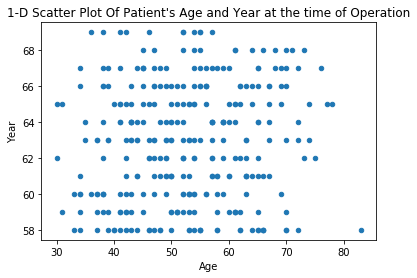

In [11]:
# This tells us that there are 224 Patients who survived and 81 who did not survive. 
#So let's figure it out who survived on basis of which parameter.
# Here we will be plotting graphs using given columns
data.plot(kind="scatter", x="Age", y="Year")
plt.title("1-D Scatter Plot Of Patient's Age and Year at the time of Operation")

# 2D Scatter Plot

Text(0.5,1,'2-D Scatter Plot Between Age And Year ')

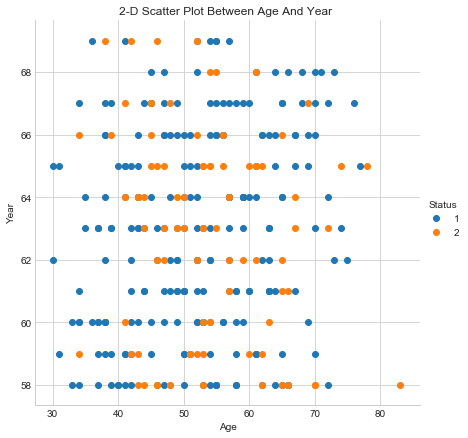

In [12]:
# We can not understand anything from these plot. As all the data is blue. So first we will have to differentiate survived
# and non survived data by different colours. So here "Hue" parameter gives different colours to variation of data present inside
# the value defined in "Hue"
# Can also use Grey or Black Grid. It just provide a grid structure where we are going to plot our data. And this grids makes it
# easier for us to read the data.
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Status", size=6).map(plt.scatter,"Age","Year").add_legend();
plt.title('2-D Scatter Plot Between Age And Year ')

Text(0.5,1,'2-D Scatter Plot Between Age And Lymph Nodes ')

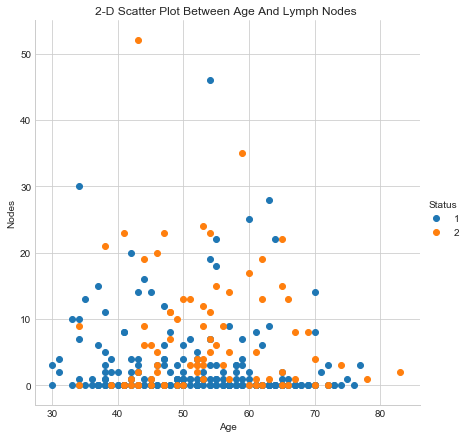

In [13]:
sns.FacetGrid(data, hue="Status", size=6).map(plt.scatter,"Age","Nodes").add_legend();
plt.title('2-D Scatter Plot Between Age And Lymph Nodes ')

This data is of no worth as we can't predict anything from this.
Now we will try other set of Columns. But trying every combination of these columns might take time.
So we will go ahead with pairplots. Which will give us the plot of all possible combinations of Column values.
And then selecting the appropriate columns we can go further.

# Pairplots

Text(0.5,1,'All Possible Pairplots Of Habberman Data')

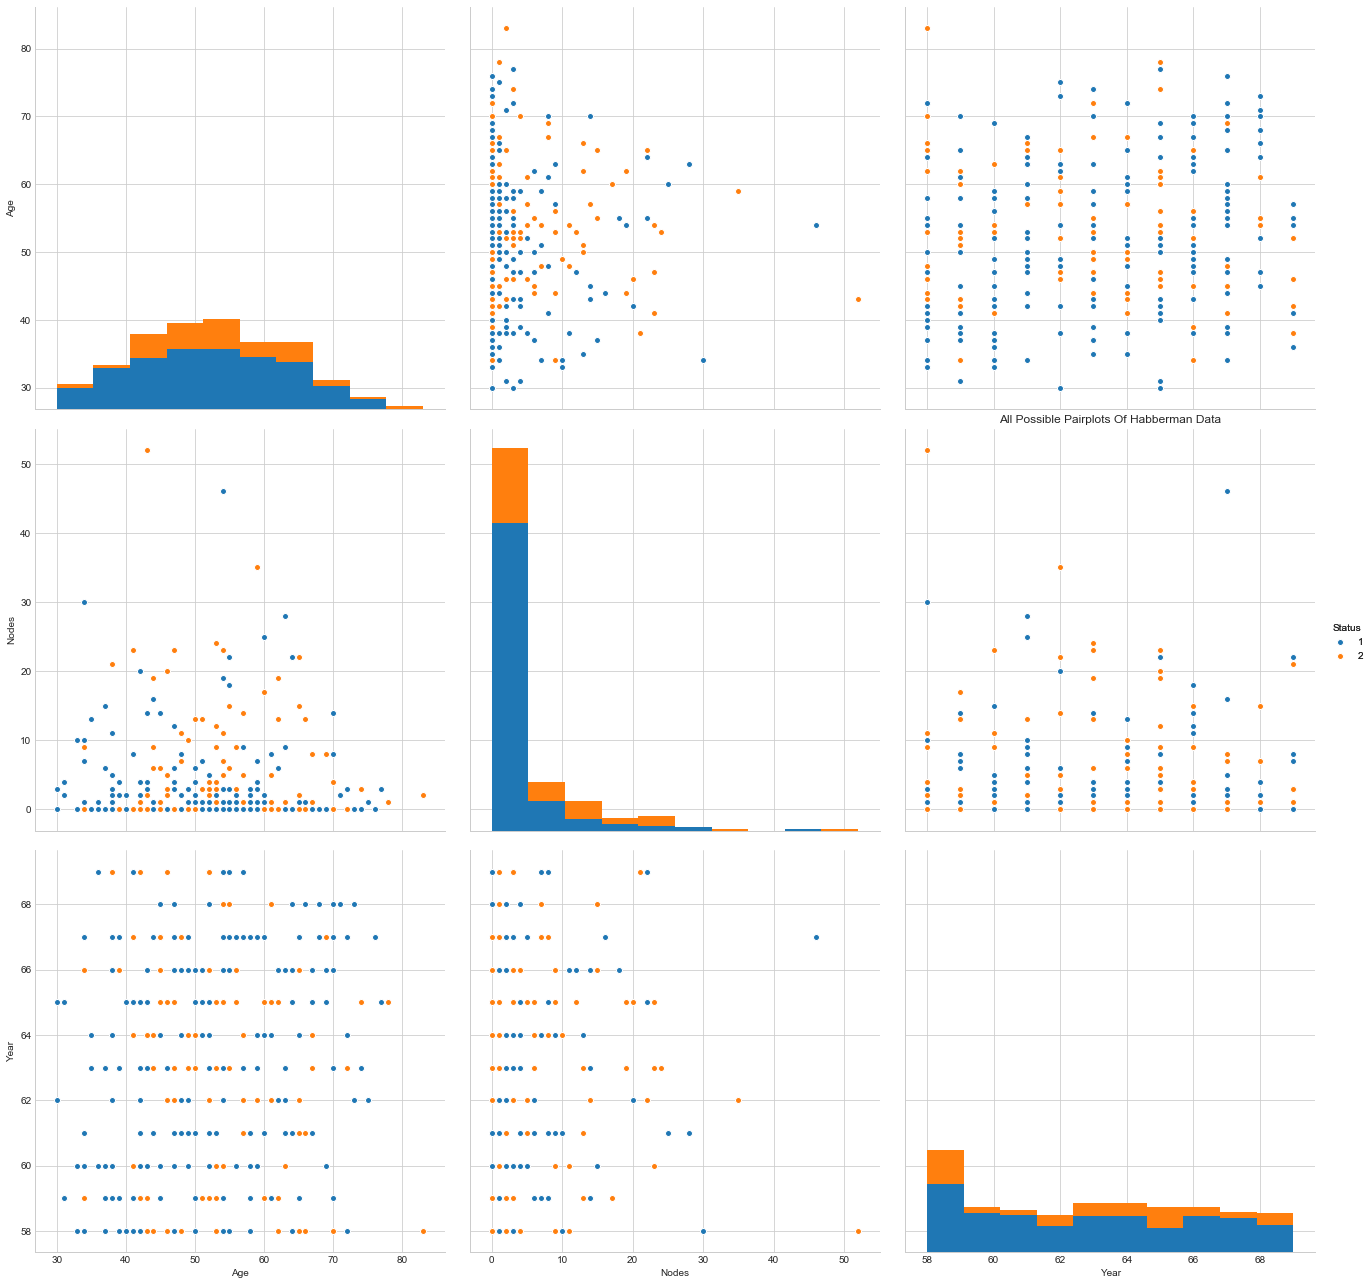

In [14]:
sns.pairplot(data,hue="Status", vars=["Age","Nodes","Year"], size=6).add_legend()
plt.title('All Possible Pairplots Of Habberman Data')

Text(0.5,1,'Plot Between Lymph Nodes and Operation Year')

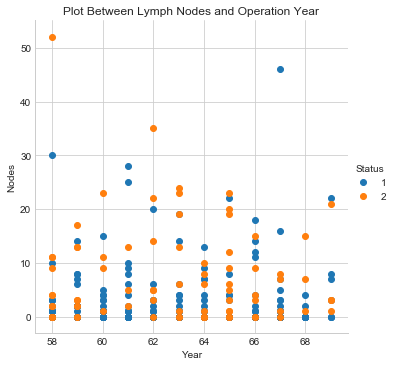

In [15]:
# Though all the graphs are not that clear. But comparatively Year-Nodes graph is bit fine so let go ahead with it.
sns.FacetGrid(data,hue="Status",size=5).map(plt.scatter,"Year","Nodes").add_legend()
plt.title('Plot Between Lymph Nodes and Operation Year')

# Univariate Analysis

In [16]:
#Still it's hard to predict something from this data. So now let's take the help of PDF & CDF and perfrom Univariate Analysis
data_alive=data.loc[data["Status"]==1]
data_dead=data.loc[data["Status"]==2]

Text(0,0.5,'Count Values')

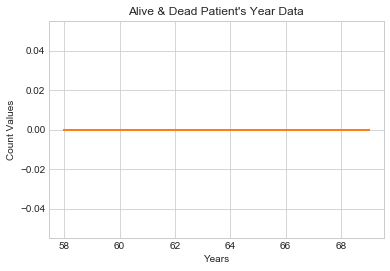

In [17]:
plt.plot(data_alive["Year"],np.zeros_like(data_alive["Year"]))
plt.plot(data_dead["Year"],np.zeros_like(data_dead["Year"]))
plt.title("Alive & Dead Patient's Year Data")
plt.xlabel("Years")
plt.ylabel("Count Values")

Text(0.5,1,' Graph of year with its count on y-axis')

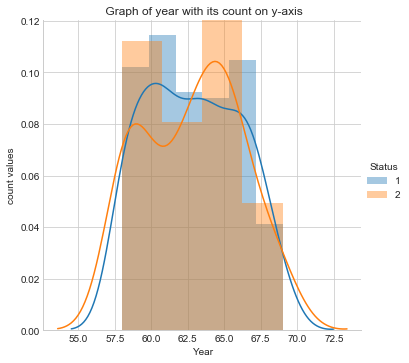

In [18]:
sns.FacetGrid(data,hue="Status",size=5).map(sns.distplot,"Year").add_legend()
plt.ylabel('count values')
plt.title(' Graph of year with its count on y-axis')

Text(0,0.5,'Count Values')

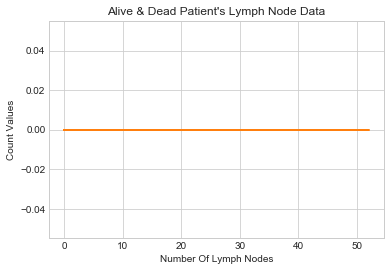

In [19]:
# Almost nothing can be predicted from this data
plt.plot(data_alive["Nodes"],np.zeros_like(data_alive["Nodes"]))
plt.plot(data_dead["Nodes"],np.zeros_like(data_dead["Nodes"]))
plt.title("Alive & Dead Patient's Lymph Node Data")
plt.xlabel("Number Of Lymph Nodes")
plt.ylabel("Count Values")

Text(0.5,1,'Graph Of survival Of Patients on Basis Of Lymph Nodes')

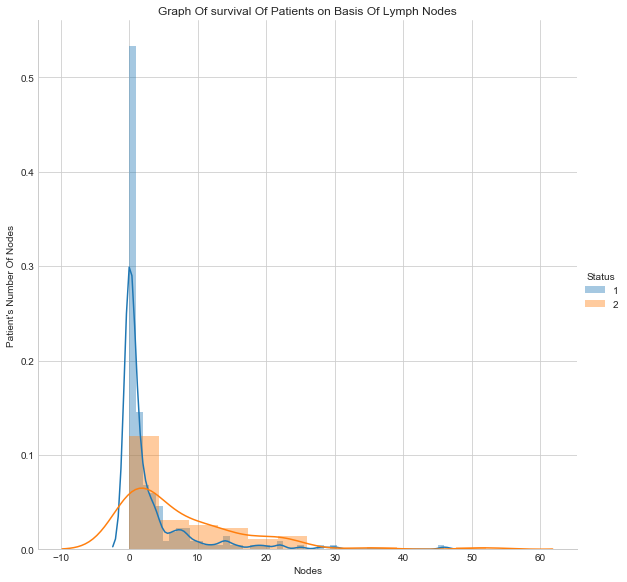

In [20]:
# It's really hard to make any analysis from this 1D plot.
# So we will try to plat a better graph with Seaborn
sns.FacetGrid(data,hue="Status",size=8).map(sns.distplot,"Nodes").add_legend()
plt.ylabel("Patient's Number Of Nodes");
plt.title("Graph Of survival Of Patients on Basis Of Lymph Nodes")

Observation:
1. Though graph is not that clear.But still we can say that The patients with the 0 Lymph Nodes has more chances of survival.
2. We can't guarntee there survival, but still survival chances are high.
3. As the number of Lymph Nodes increases chances of survival reduces.
4. We can, Say Survival Chances is inversely proportional to Lymph Nodes.
5. Patients who has Lymph Nodes<=2 had higher chances of survival.
6. It is hard to come to a exact conclusion as the data is overlapping alot.

Text(0.5,1,'Survival Graph On Basis Of Age')

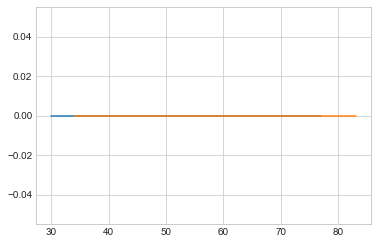

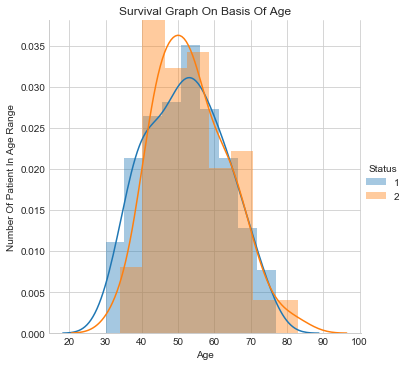

In [21]:
plt.plot(data_alive["Age"],np.zeros_like(data_alive["Age"]))
plt.plot(data_dead["Age"],np.zeros_like(data_dead["Age"]))
sns.FacetGrid(data,hue="Status",size=5).map(sns.distplot,"Age").add_legend()
plt.ylabel("Number Of Patient In Age Range")
plt.title("Survival Graph On Basis Of Age")

Observations:
1. Patient with the age below 35 has higher chances of survival.
2. Though we can't guarntee it but still they have high chances of survival.
3. Patient with Age > 40 and age < 45 has lowest chances of survival.

# PDF & CDF

[0.91517857 0.04910714 0.02232143 0.00892857 0.00446429]
[ 0.   9.2 18.4 27.6 36.8 46. ]


Text(0.5,0,'Number Of Lymph Nodes')

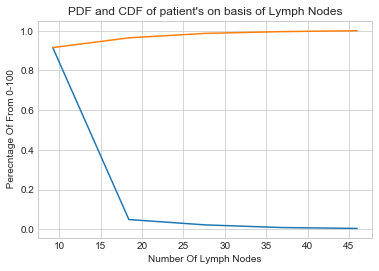

In [22]:
# CDF tells us data more precisely by percentage. That how many patients with Lower Lymph Node will survive.
count,bin_edges= np.histogram(data_alive["Nodes"],bins=5,density=True)
pdf=count/(sum(count))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("PDF and CDF of patient's on basis of Lymph Nodes")
plt.ylabel(" Perecntage Of From 0-100")
plt.xlabel("Number Of Lymph Nodes")

[0.91517857 0.04910714 0.02232143 0.00892857 0.00446429]
[ 0.   9.2 18.4 27.6 36.8 46. ]
[0.71604938 0.18518519 0.07407407 0.01234568 0.01234568]
[ 0.  10.4 20.8 31.2 41.6 52. ]


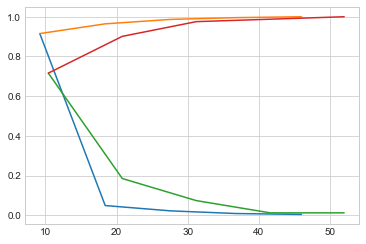

In [23]:
# CDF of both Alive Patients and Dead Patients
# Taking both the data's so that we don't misinterpret things

count,bin_edges= np.histogram(data_alive["Nodes"],bins=5,density=True)
pdf=count/(sum(count))
print(pdf)
print(bin_edges)

# Computation of CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


count,bin_edges= np.histogram(data_dead["Nodes"],bins=5,density=True)
pdf=count/(sum(count))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

72% Patient with Lymph Node = 12, Died.
This percentage increases with increase in the number of Lymph Nodes.

Summary:
1.The Entire data was not too good to be analyzed and comeup to a strong conclusion. 
2.There are 2 major factors which can lead to death.
    i. Lymph Nodes (most appropriate factor)
    ii. Age
3.The patients who have 0 lymph nodes have the highest chances of survival. They might die from other disease though but not     Cancer.
4.Apart from this patient who are young and have Lymph node in small extent has higher survival rate.
5.Death Rate is directly proportional to Number Of Lymph Nodes.